In [ ]:
from PIL import Image
import os
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive

drive.mount("/content/gdrive")

def load_raw_images(y_path):
    Y = []
    for filename in os.listdir(y_path):
        if filename.endswith("png"):
            Y.append(filename)
    return Y

def load_test_images(path):
    images = load_raw_images(path)
    np_images = []
    for image in images:
        im_x = Image.open(f"{path}/{image}")
        im_x_np = np.asarray(im_x, dtype="float32") / 255.0
        np_images.append(im_x_np)
    return np_images

def count_pixels(image):
    red, green, blue = (226, 19, 15), (11, 195, 72), (51, 15, 200)
    colors = {"red": 0, "green": 0, "blue": 0}
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            pixel = image[i][j]
            pixel = np.round(pixel*255).astype('int32')
            if (pixel == red).all():
                colors["red"] += 1
            elif (pixel == blue).all():
                colors["blue"] += 1
            elif (pixel == green).all():
                colors["green"] += 1
    return colors

def get_pixel_data(Y):
    quantity = Y.shape[0]
    print(f"[INFO] Get pixels from {quantity} images.")
    colors_global = {"red": 0, "green": 0, "blue": 0}
    df = pd.DataFrame(data=np.zeros((quantity, 3)), columns=['red', 'green', 'blue'])
    for i, image in enumerate(Y):
        print(f"[INFO] Image {i+1}/{quantity}")
        colors = count_pixels(image)
        for color, value in colors.items():
            colors_global[color] += value
            df.loc[i][color] = value
    print("[INFO] Count complete.")
    return colors_global, df

def get_dataset_metadata(X, Y):
    size = X.shape[0]
    height, width = X.shape[1:3]
    channels = X.shape[3]
    parameters = {"size": size,
                  "height": height,
                  "width": width,
                  "channels": channels}
    for parameter, value in parameters.items():
        print(f"[INFO] {parameter} => {value}")

def display(X, Y, name):
    fig, ax = plt.subplots(ncols=2,
                           nrows=X.shape[0],
                           figsize=(X.shape[0]*5, X.shape[0]*8),
                           sharex=True, sharey=True)
    x_ax = []
    df_ax = pd.DataFrame.from_records(ax)
    # Plot initial images
    for i, im in enumerate(X):
        df_ax.iloc[i][0].imshow(im)
        df_ax.iloc[i][0].set_xticklabels([])
        df_ax.iloc[i][0].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][0].set_title(f'Satellite Images 512x512 pixels', fontsize=20)
    for i, im in enumerate(Y):
        df_ax.iloc[i][1].imshow(im)
        df_ax.iloc[i][1].set_xticklabels([])
        df_ax.iloc[i][1].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][1].set_title(f'RGB Segmentation Mask', fontsize=20)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(name)
    plt.show()

Mounted at /content/gdrive


In [ ]:
def load_raw_images(y_path):
    Y = []
    for filename in os.listdir(y_path):
        if filename.endswith("png"):
            Y.append(filename)
    return Y

def load_test_images(path):
    images = load_raw_images(path)
    np_images = []
    for image in images:
        im_x = Image.open(f"{path}/{image}")
        im_x_np = np.asarray(im_x, dtype="float32") / 255.0
        np_images.append(im_x_np)
    return np_images

Y = load_test_images("/content/gdrive/MyDrive/satellite/masks")
X = load_test_images("/content/gdrive/MyDrive/satellite/images")

In [ ]:
Y_np = np.array(Y)
X_np = np.array(X)
X_np.shape



(50, 512, 512, 3)

In [ ]:
colors, df = get_pixel_data(Y_np[:])

[INFO] Get pixels from 50 images.
[INFO] Image 1/50
[INFO] Image 2/50
[INFO] Image 3/50
[INFO] Image 4/50
[INFO] Image 5/50
[INFO] Image 6/50
[INFO] Image 7/50
[INFO] Image 8/50
[INFO] Image 9/50
[INFO] Image 10/50
[INFO] Image 11/50
[INFO] Image 12/50
[INFO] Image 13/50
[INFO] Image 14/50
[INFO] Image 15/50
[INFO] Image 16/50
[INFO] Image 17/50
[INFO] Image 18/50
[INFO] Image 19/50
[INFO] Image 20/50
[INFO] Image 21/50
[INFO] Image 22/50
[INFO] Image 23/50
[INFO] Image 24/50
[INFO] Image 25/50
[INFO] Image 26/50
[INFO] Image 27/50
[INFO] Image 28/50
[INFO] Image 29/50
[INFO] Image 30/50
[INFO] Image 31/50
[INFO] Image 32/50
[INFO] Image 33/50
[INFO] Image 34/50
[INFO] Image 35/50
[INFO] Image 36/50
[INFO] Image 37/50
[INFO] Image 38/50
[INFO] Image 39/50
[INFO] Image 40/50
[INFO] Image 41/50
[INFO] Image 42/50
[INFO] Image 43/50
[INFO] Image 44/50
[INFO] Image 45/50
[INFO] Image 46/50
[INFO] Image 47/50
[INFO] Image 48/50
[INFO] Image 49/50
[INFO] Image 50/50
[INFO] Count complete.


In [ ]:
#saving to a csv file
df.to_csv("/content/gdrive/MyDrive/satellite/pixels.csv")

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/satellite/pixels.csv")
df = df.loc[:][['red', 'green', 'blue']]
df.head()

,red,green,blue
0,47709.0,211680.0,2755.0
1,69967.0,192177.0,0.0
2,31196.0,230948.0,0.0
3,0.0,261850.0,294.0
4,105398.0,153143.0,3603.0


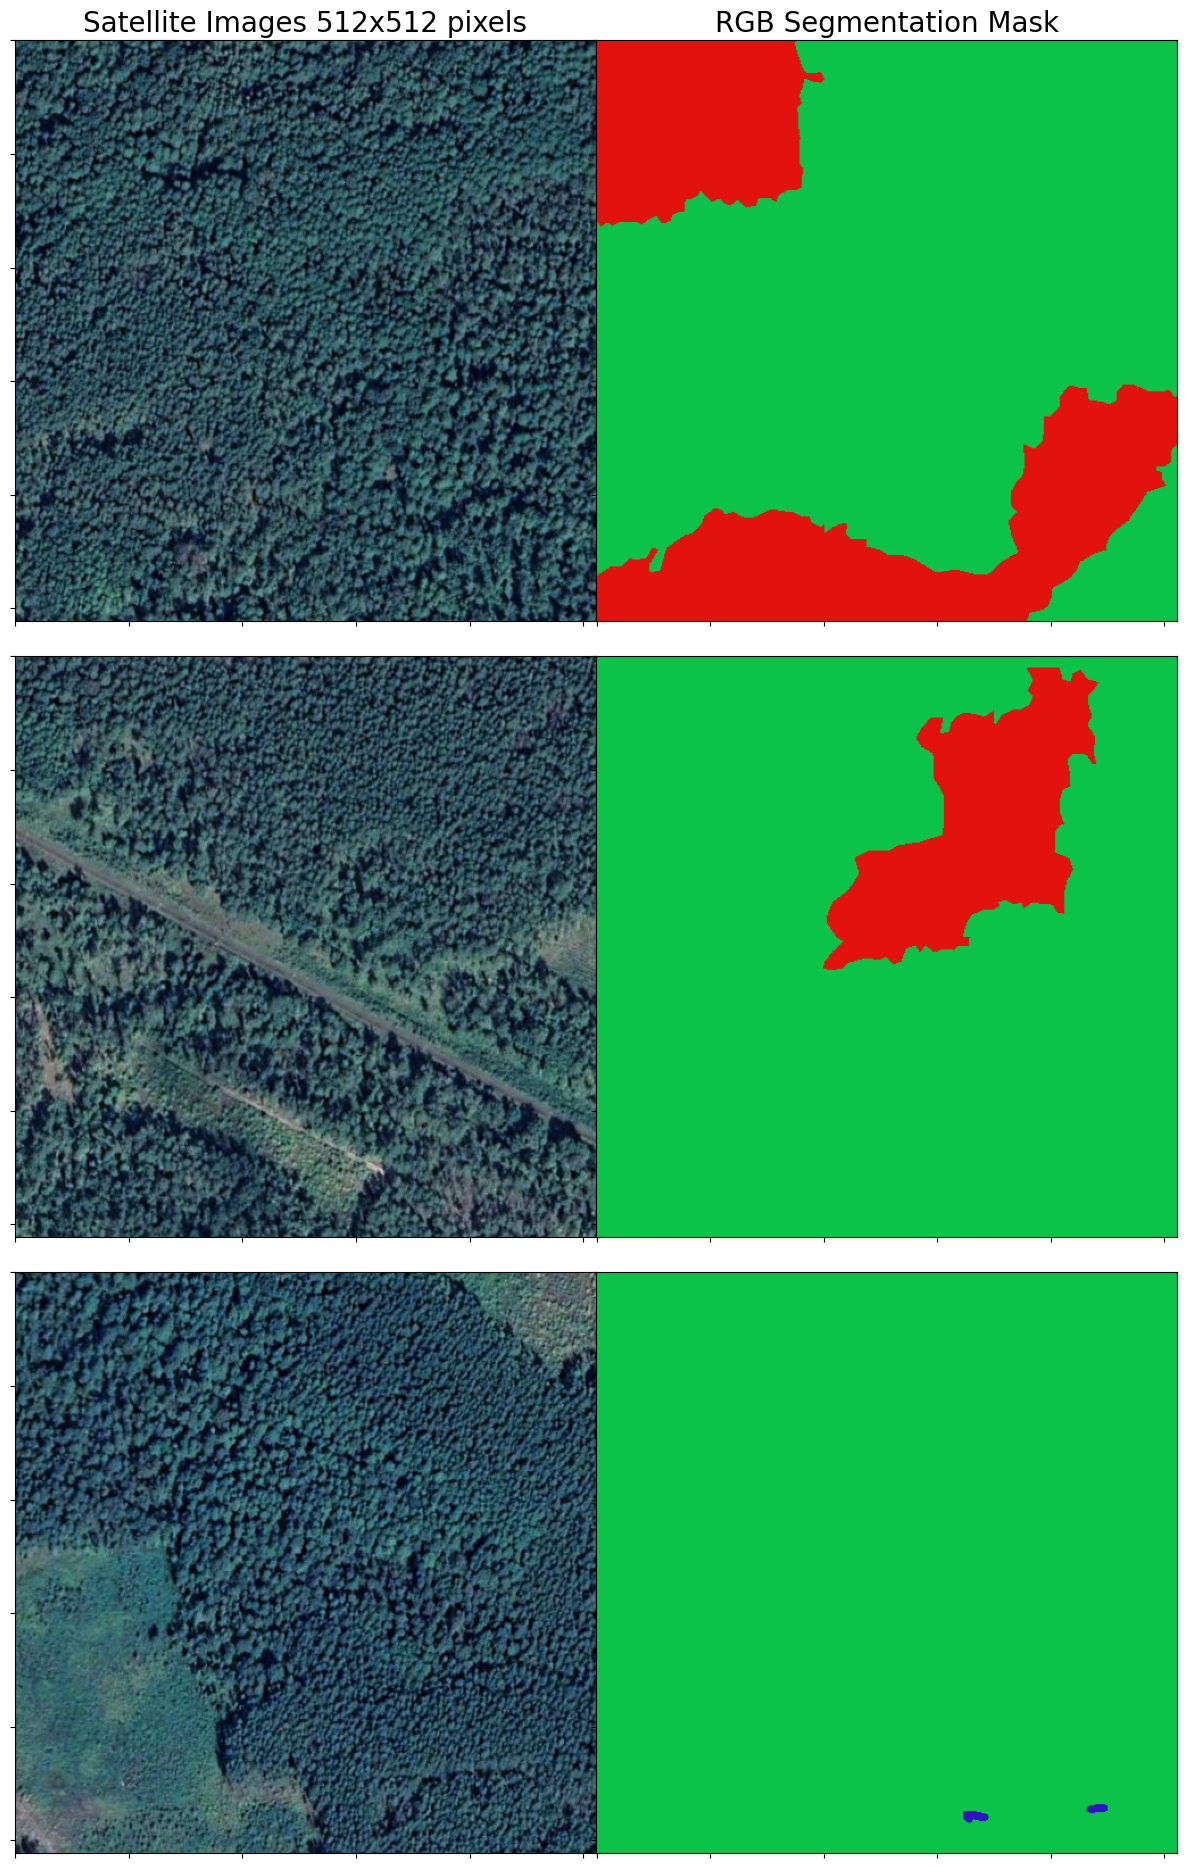

In [ ]:
start = 1
def display(X, Y, name):
    fig, ax = plt.subplots(ncols=2,
                           nrows=X.shape[0],
                           figsize=(X.shape[0]*5, X.shape[0]*8),
                           sharex=True, sharey=True)
    x_ax = []
    df_ax = pd.DataFrame.from_records(ax)
    # Plot initial images
    for i, im in enumerate(X):
        df_ax.iloc[i][0].imshow(im)
        df_ax.iloc[i][0].set_xticklabels([])
        df_ax.iloc[i][0].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][0].set_title(f'Satellite Images 512x512 pixels', fontsize=20)
    for i, im in enumerate(Y):
        df_ax.iloc[i][1].imshow(im)
        df_ax.iloc[i][1].set_xticklabels([])
        df_ax.iloc[i][1].set_yticklabels([])
        if i == 0:
            df_ax.iloc[i][1].set_title(f'RGB Segmentation Mask', fontsize=20)

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(name)
    plt.show()
display(X_np[start:start+3], Y_np[start:start+3], name="Images_and_masks.png")

<ipython-input-10-d8d258fbc99c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['red'],color='red',)
<ipython-input-10-d8d258fbc99c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['green'],color='green')
<ipython-input-10-d8d258fbc99c>:9: UserWarning: 

`distplot` is a deprecated functi

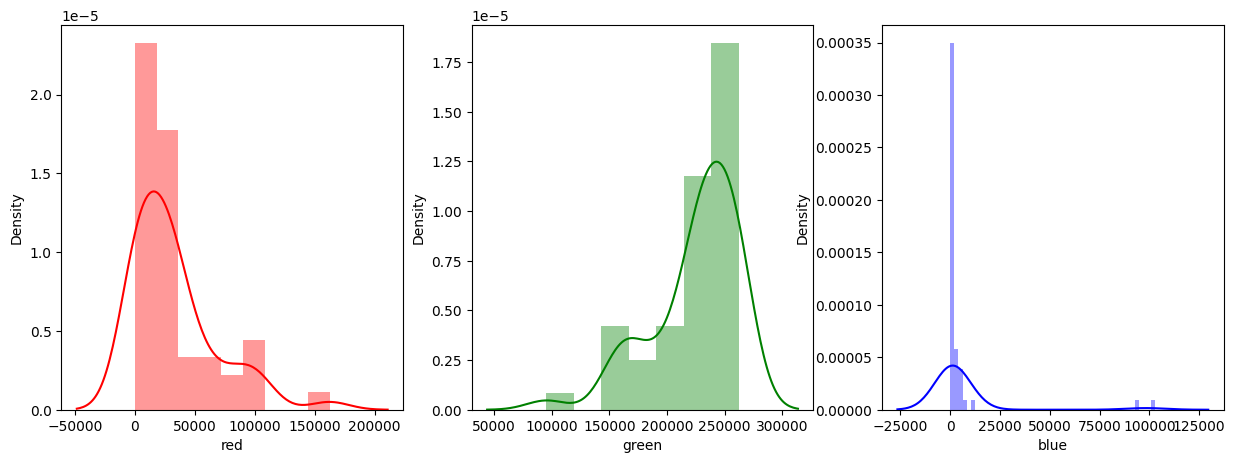

In [ ]:
#data visualization
import seaborn as sns
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.distplot(df['red'],color='red',)
plt.subplot(1,3,2)
sns.distplot(df['green'],color='green')
plt.subplot(1,3,3)
sns.distplot(df['blue'],color='blue')
plt.show()


In [ ]:
#normalization
images=X_np/511.0
masks=Y_np/511.0

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(images, masks, test_size=0.2, random_state=42)

# Further split validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.5, random_state=42)

print(f'Training set size: {X_train.shape[0]}')
print(f'Validation set size: {X_val.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')


Training set size: 40
Validation set size: 5
Test set size: 5


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Reshape

def create_cnn_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        # Reshape the output to match the label shape
        Dense(input_shape[0] * input_shape[1] * 3, activation='linear'), # Linear activation for pixel-wise predictions
        Reshape((input_shape[0], input_shape[1], 3))
    ])
    return model

# Instantiate and compile the model
input_shape = (512, 512, 3)
model = create_cnn_model(input_shape)

# Use categorical crossentropy if your labels are one-hot encoded,
# otherwise consider using 'sparse_categorical_crossentropy' or a different loss function
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model summary
model.summary()

# ... (rest of your code)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 510, 510, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 510, 510, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 255, 255, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 253, 253, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# Data augmentation
data_gen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=30, zoom_range=0.2)

# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
data_gen.flow(X_train, y_train, batch_size=32),
validation_data=(X_val, y_val),
epochs=50,
callbacks=[early_stopping]
)


Epoch 1/50
2/2 [==============================] - 52s 13s/step - loss: 0.0115 - accuracy: 0.3335 - val_loss: 0.0101 - val_accuracy: 0.3414
Epoch 2/50
2/2 [==============================] - 47s 13s/step - loss: 0.0106 - accuracy: 0.3381 - val_loss: 0.0079 - val_accuracy: 0.3733
Epoch 3/50
2/2 [==============================] - 45s 12s/step - loss: 0.0089 - accuracy: 0.3540 - val_loss: 0.0068 - val_accuracy: 0.3963
Epoch 4/50
2/2 [==============================] - 44s 11s/step - loss: 0.0076 - accuracy: 0.3693 - val_loss: 0.0061 - val_accuracy: 0.4075
Epoch 5/50
2/2 [==============================] - 44s 11s/step - loss: 0.0067 - accuracy: 0.3816 - val_loss: 0.0056 - val_accuracy: 0.4138
Epoch 6/50
2/2 [==============================] - 43s 32s/step - loss: 0.0059 - accuracy: 0.3890 - val_loss: 0.0053 - val_accuracy: 0.4187
Epoch 7/50
2/2 [==============================] - 45s 32s/step - loss: 0.0054 - accuracy: 0.3938 - val_loss: 0.0050 - val_accuracy: 0.4207
Epoch 8/50
2/2 [===========

1/1 [==============================] - 1s 1s/step - loss: 0.0044 - accuracy: 0.4351
Test Accuracy: 0.4351
1/1 [==============================] - 1s 1s/step


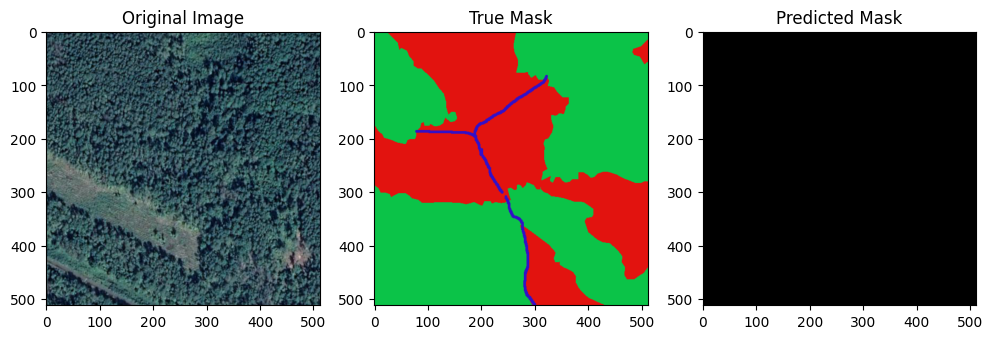

In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_val, y_val)
print(f'Test Accuracy: {test_acc:.4f}')

# Make predictions on the validation set
predictions = model.predict(X_val)
# Threshold predictions to obtain binary masks
threshold = 0.5
predicted_masks = (predictions > threshold).astype(np.uint64)

# Plot sample results
def plot_sample(X, y_true, y_pred, index):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(X[index])

    plt.subplot(1, 3, 2)
    plt.title("True Mask")
    plt.imshow(Y[index])  # Convert one-hot back to single channel

    plt.subplot(1, 3, 3)
    plt.title("Predicted Mask")
    plt.imshow(predicted_masks[index])  # Convert one-hot back to single channel

    plt.show()

# Plot a sample result
plot_sample(X=X, y_true=Y, y_pred=predicted_masks, index=4)
